In [ ]:
import pandas as pd
import numpy as np
from google.colab import files


In [ ]:
upload=files.upload()

Saving Airlines+Data.xlsx to Airlines+Data.xlsx


In [ ]:
data=pd.read_excel('Airlines+Data.xlsx')
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [ ]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [ ]:
data.describe().style.background_gradient(cmap='Accent_r')

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


<Axes: >

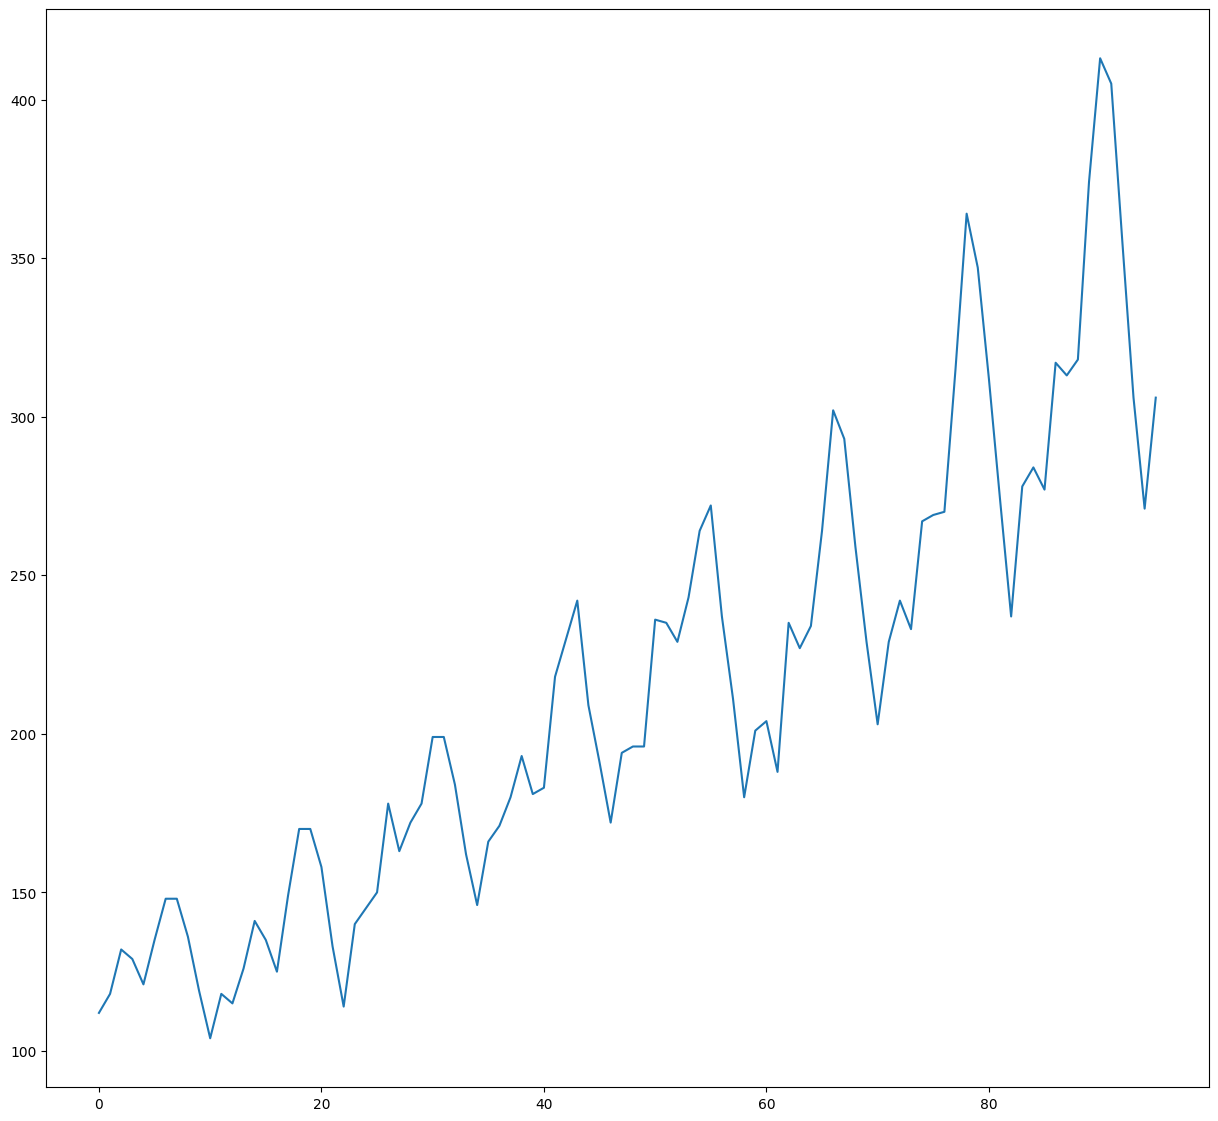

In [ ]:
data['Passengers'].plot(figsize=(15,14))

In [ ]:
data.shape

(96, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [ ]:
data.rename({'Month':'Date'},axis=1,inplace=True)

In [ ]:
data

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [ ]:
data1=data.copy()
data1.set_index('Date',inplace=True)

In [ ]:
#data['Date']=pd.to_datetime(data.Date,format="%b-%y")
data["Date"]  = pd.to_datetime(data.Date, format="%b-%y")
data['month']=data.Date.dt.strftime("%b")
data['year']=data.Date.dt.strftime("%Y")


In [ ]:
data

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


<Axes: xlabel='month', ylabel='year'>

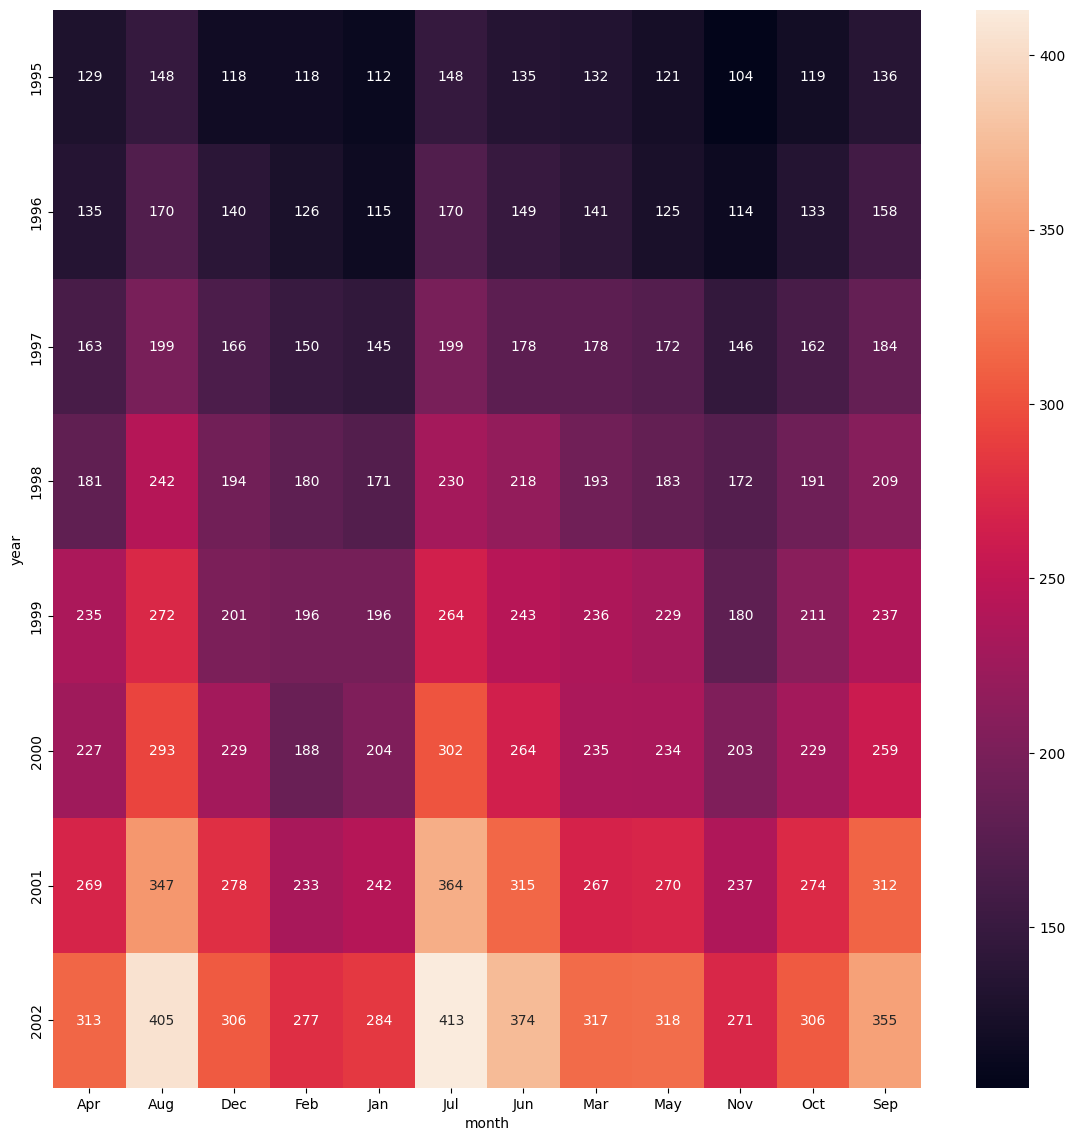

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,14))
heatmap_y=pd.pivot_table(data=data,values='Passengers',index='year',columns='month',aggfunc='mean',fill_value=0)
sns.heatmap(heatmap_y,annot=True,fmt="g")

<Axes: xlabel='year', ylabel='Passengers'>

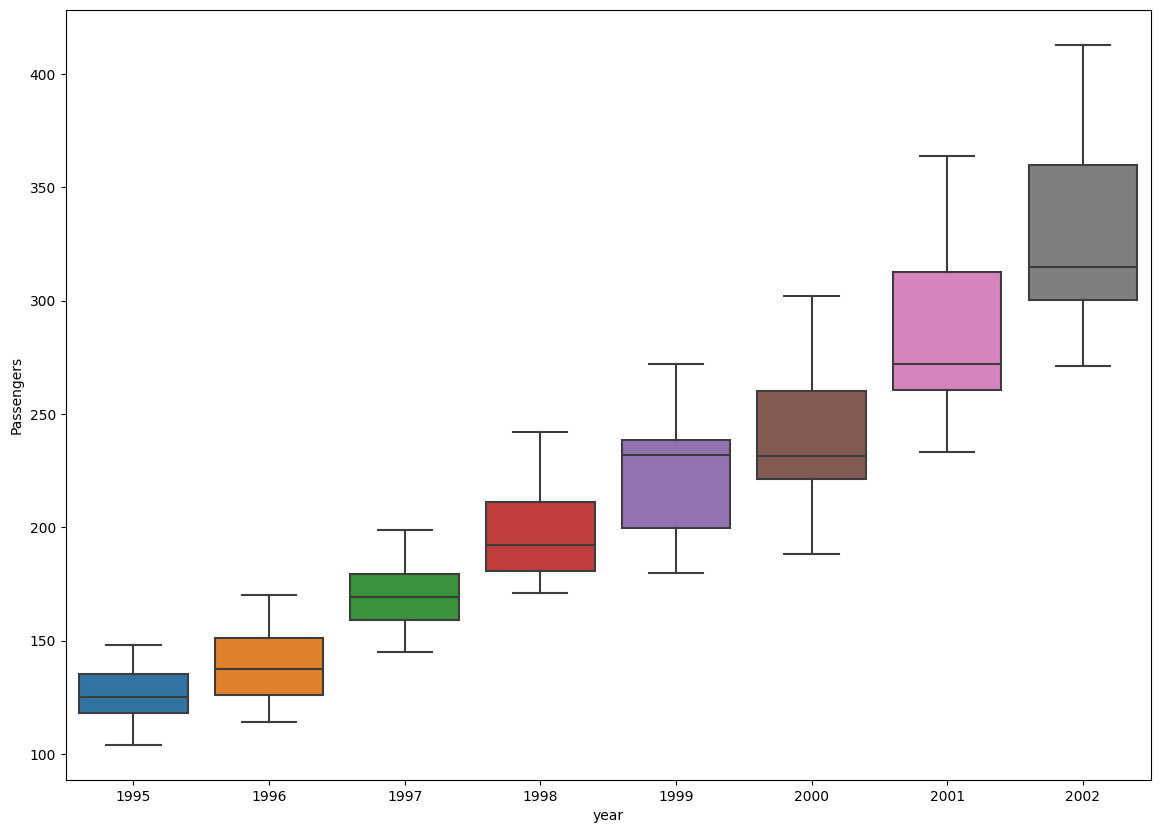

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(data,y='Passengers',x='year')

<Axes: xlabel='Date'>

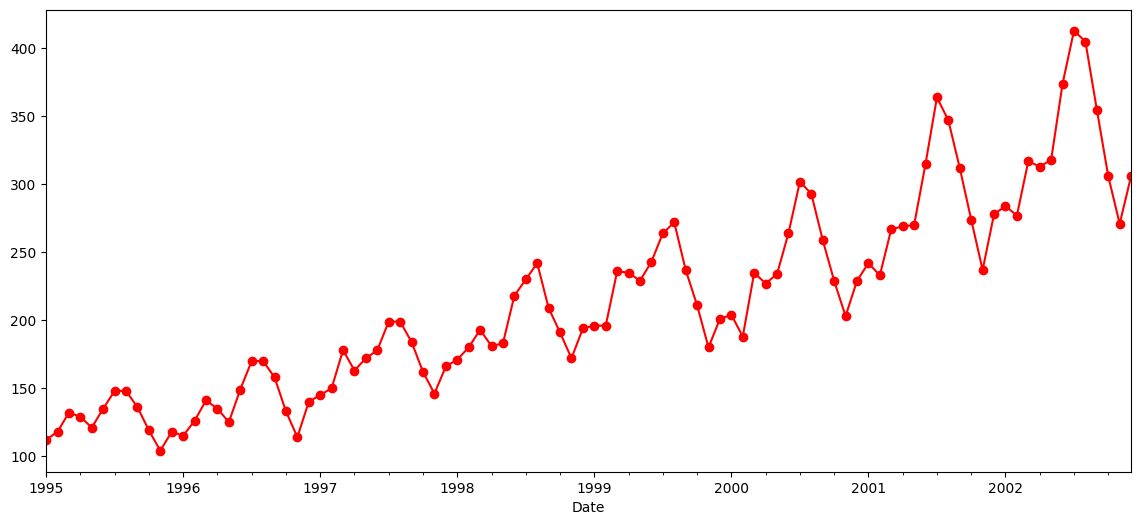

In [ ]:
data1.Passengers.plot(figsize=[14,6],marker='o',color='red')

<Axes: xlabel='year', ylabel='Passengers'>

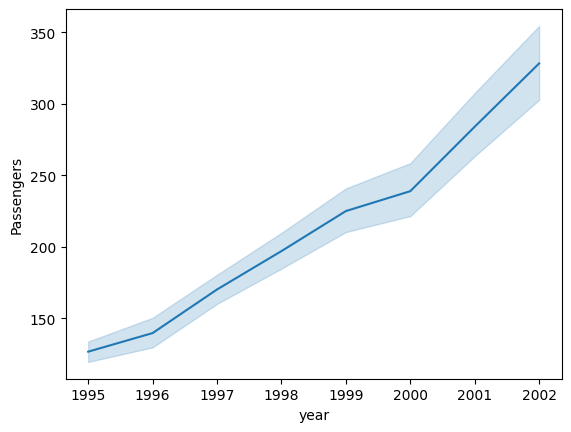

In [ ]:
#plt.figure(figsize=(14,100))
sns.lineplot(data,x='year',y='Passengers')

In [ ]:
month_dummies = pd.DataFrame(pd.get_dummies(data['month']))
data1 = pd.concat([data,month_dummies],axis = 1)
data1.head()

,Date,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
data1['t']=np.arange(1,97)
data1['t_squared']=(data1['t'])**2
data1['log_Passenger']=np.log(data1['Passengers'])
data1.head()

,Date,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passenger
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [ ]:
Train=data1.head(75)
Test=data1.tail(25)

**linear_model**

In [ ]:
import statsmodels.formula.api as smf
linear_model=smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
#model_predict=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
print("rmse_linear :",rmse_linear)

rmse_linear : 51.83809749584509


In [ ]:
exp_model=smf.ols('log_Passenger~t',data=Train).fit()
pred_exp=pd.Series(exp_model.predict(pd.DataFrame(Test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(Test['log_Passenger'])-np.array(pred_exp))**2))
print("rmse_exp :",rmse_exp)

rmse_exp : 0.13409656145072357


In [ ]:
quad_model=smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_quad=pd.Series(quad_model.predict(pd.DataFrame(Test[['t','t_squared']])))
rmse_quad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_quad))**2))
print("rmse_quad :",rmse_quad)


rmse_quad : 54.031406456252654


In [ ]:

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
print('rmse_add :',rmse_add)

rmse_add : 123.02763788084235


In [ ]:
add_sea_quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
#add_sea_quad=smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_model=pd.Series(add_sea_quad.predict(Test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_asq=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_model))**2))
print("rmse_asq :",rmse_asq)

rmse_asq : 36.536274445472245


In [ ]:
mul_sea=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_model=pd.Series(mul_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_ms=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_model))**2))
print("rmse_mulsea :",rmse_ms)

rmse_mulsea : 123.02763788084235


In [ ]:
data2=pd.DataFrame({'models':['linear','Exponential','Quadrative Model','Additive Seasonality','Additive Seasonality QT','Mult Seasonality'],'Values':[rmse_linear,rmse_exp,rmse_add,rmse_quad,rmse_asq,rmse_ms]})

data2

,models,Values
0,linear,51.838097
1,Exponential,0.134097
2,Quadrative Model,123.027638
3,Additive Seasonality,54.031406
4,Additive Seasonality QT,36.536274
5,Mult Seasonality,123.027638


In [ ]:
data2.sort_values('Values')


,models,Values
1,Exponential,0.134097
4,Additive Seasonality QT,36.536274
0,linear,51.838097
3,Additive Seasonality,54.031406
2,Quadrative Model,123.027638
5,Mult Seasonality,123.027638


In [ ]:
data = [['2003-01-01', 'Jan'], ['2003-02-01', 'Feb'], ['2003-03-01', 'Mar'],['2003-04-01', 'Apr'],['2003-5-01', 'May'],['2003-06-01', 'Jun'],
        ['2003-07-01', 'Jul'],['2003-08-01', 'Aug'],['2003-09-01', 'Sep'],['2003-10-01', 'Oct'],['2003-11-01', 'Nov'],['2003-12-01', 'Dec']]
forecast = pd.DataFrame(data, columns = ['Date', 'Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-5-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [ ]:
dummies=pd.DataFrame(pd.get_dummies(data1['month']))


In [ ]:
forecast1=pd.concat([data1,dummies],axis=1)#,inplace=True)
forecast1

,Date,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
forecast1['t']=np.arange(1,97)
forecast1['log_Passengers']=np.log(data1['Passengers'])
forecast1

,Date,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,...,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,log_Passengers
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,4.718499
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,4.770685
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4.882802
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.003887
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5.872118
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5.723585
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5.602119


In [ ]:
Train_fore=forecast1.head(75)
Test_fore=forecast1.tail(25)

In [ ]:
exp_model=smf.ols('log_Passenger~t',data=Train).fit()
pred_exp=pd.Series(exp_model.predict(pd.DataFrame(Test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(Test['log_Passenger'])-np.array(pred_exp))**2))
print("rmse_exp :",rmse_exp)

rmse_exp : 0.13409656145072357
